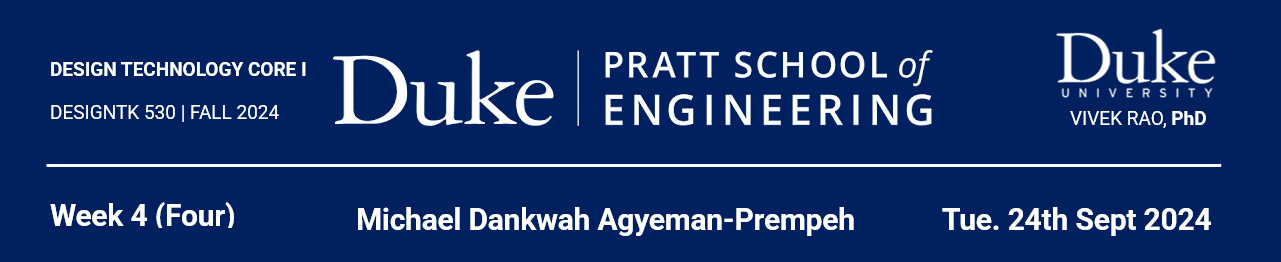

# **Assignment I-4   ||   Visualizations and Dashboard**

 ### Click [here](https://drive.google.com/drive/folders/13bKHaVdVcOXP1Z0B1tWRjMx0yMrfeThO?usp=sharing) to access All Datasets used for this assignment.
 *Google Drive link address, with permissions enabled*

### Connecting to drive to access data to analyze and importing all required libraries

In [402]:
# Connecting my Google drive to Colab
from google.colab import drive
drive.mount('/content/drive')

# Importing Pandas and Numpy for analysis
import pandas as pd
import numpy as np

# Importing Matplotlib for plotting
import matplotlib.pyplot as plt

# Other Required Libraries
import seaborn as sns
import json
import plotly.express as px
import random

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


>>> ## **1. Visualizations In The Wild**

### **Identifying a visualization : Gaza-Israel War**

I encountered a visualization on the [BBC News website about the Gaza-Israel war](https://www.bbc.com/news/world-middle-east-20415675). The main graph shows [the displacement of Gaza's population over time](https://ichef.bbci.co.uk/ace/standard/976/cpsprodpb/161A/production/_132985650_displaced_people_in_gaza2_640-nc-2x-nc.png.webp), while a secondary graph illustrates [the number of humanitarian aid lorries entering Gaza](https://ichef.bbci.co.uk/ace/standard/976/cpsprodpb/AE72/production/_132985644_humanitarian_aid_lorries2_640-nc-2x-nc.png.webp).

### **Conducting background research**

The visualizations support a news article about the humanitarian crisis in Gaza. The context is the ongoing conflict and its impact on civilians. The objective appears to be illustrating the scale of displacement and the challenges in providing aid.

### **Speculating on the key argument / narrative**

The design team seems to be establishing a narrative of widespread suffering and inadequate humanitarian support in Gaza. They aim to evoke empathy by contrasting the massive displacement with the limited aid (food, shelter) reaching the area.

The visualizations successfully communicate:
1. The rapid increase in displaced persons over time
2. The scale of the humanitarian crisis
3. The disparity between need and aid delivery for families in Gaza

**Assessing the main graph**, it effectively uses color gradients to show the intensifying crisis, with darker shades representing higher numbers of displaced people. Icons represent population units, increasing in number to visually depict the growing displacement.

The secondary graph on aid lorries complements this narrative by highlighting the insufficient support reaching Gaza with the lorry icons having a grey shaded portion.

These visualizations are largely successful in conveying the key arguments. They provide clear, impactful representations of complex data, allowing viewers to quickly grasp the severity of the situation. The use of color, icons, and comparative graphs creates a compelling visual story that supports the BBC's reporting on the humanitarian aspects of the conflict.

![imag#1](https://ichef.bbci.co.uk/ace/standard/976/cpsprodpb/161A/production/_132985650_displaced_people_in_gaza2_640-nc-2x-nc.png.webp)![imag#1](https://ichef.bbci.co.uk/ace/standard/976/cpsprodpb/AE72/production/_132985644_humanitarian_aid_lorries2_640-nc-2x-nc.png.webp)

>>> ## **2. Visualizations From Data**

>>>> ### a. Selection Of Data Of Interest/Data Sourcing & Data Cleaning/Data Refactoring:

In [403]:
# i. Sourcing the traffic data
# Road Traffic Accidents of Addis Ababa City
# https://www.kaggle.com/datasets/saurabhshahane/road-traffic-accidents?select=cleaned.csv

rta_data = pd.read_csv('/content/drive/MyDrive/MEngDTI@Duke/DTK530/I-4/V&D_data/RTAdata_cleaned.csv')

# No of rows
rta_data_rows = rta_data.shape[0]
# No of columns
rta_data_columns = rta_data.shape[1]
# Get the values
print(rta_data_rows,'\n',rta_data_columns)

# Showing first 10 rows of table
rta_data.head(10)

12316 
 15


,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
5,31-50,Male,Unknown,Unknown,Unknown,Unknown,Y Shape,Unknown,Daylight,Normal,Vehicle with vehicle collision,U-Turn,Not a Pedestrian,Overloading,2
6,18-30,Male,Junior high school,Employee,2-5yr,Undivided Two way,Crossing,Unknown,Daylight,Normal,Vehicle with vehicle collision,Moving Backward,Not a Pedestrian,Other,2
7,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,U-Turn,Not a Pedestrian,No priority to vehicle,2
8,18-30,Male,Junior high school,Employee,Above 10yr,other,Y Shape,Earth roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Crossing from driver's nearside,Changing lane to the right,2
9,18-30,Male,Junior high school,Employee,1-2yr,Undivided Two way,Y Shape,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,U-Turn,Not a Pedestrian,Moving Backward,1


In [404]:
rta_columns = rta_data.columns
rta_columns

Index(['Age_band_of_driver', 'Sex_of_driver', 'Educational_level',
       'Vehicle_driver_relation', 'Driving_experience', 'Lanes_or_Medians',
       'Types_of_Junction', 'Road_surface_type', 'Light_conditions',
       'Weather_conditions', 'Type_of_collision', 'Vehicle_movement',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

**NB:** The data I am working with is data that has been prepared from manual records of road traffic accident of the year 2017-2020 from Addis Abab Sub City Police Departments.

In [405]:
# ii. Data Cleaning and Refactoring
# Renaming the dataframe columns

#Let's view the old column names
rta_columns = rta_data.columns
print(*rta_columns, sep='\n')

Age_band_of_driver
Sex_of_driver
Educational_level
Vehicle_driver_relation
Driving_experience
Lanes_or_Medians
Types_of_Junction
Road_surface_type
Light_conditions
Weather_conditions
Type_of_collision
Vehicle_movement
Pedestrian_movement
Cause_of_accident
Accident_severity


In [406]:
# Renaming the dataframe columns taking out the underscores
new_rta_column_names = {

    'Age_band_of_driver':'Age Band of Driver',
    'Sex_of_driver':'Sex of Driver',
    'Educational_level':'Educational Level',
    'Vehicle_driver_relation':'Vehicle Driver Relation',
    'Driving_experience':'Driver Experience',
    'Lanes_or_Medians':'Lanes or Medians',
    'Types_of_Junction':'Type of Junction',
    'Road_surface_type':'Road Surface Type',
    'Light_conditions':'Light Conditions',
    'Weather_conditions':'Weather Conditions',
    'Type_of_collision':'Type of Collision',
    'Vehicle_movement':'Vehicle Movement',
    'Pedestrian_movement':'Pedestrain Movement',
    'Cause_of_accident':'Cause of Accident',
    'Accident_severity': 'Accident Severity'
}

rta_data = rta_data.rename(columns=new_rta_column_names)

print(*rta_data.columns, sep='\n')

Age Band of Driver
Sex of Driver
Educational Level
Vehicle Driver Relation
Driver Experience
Lanes or Medians
Type of Junction
Road Surface Type
Light Conditions
Weather Conditions
Type of Collision
Vehicle Movement
Pedestrain Movement
Cause of Accident
Accident Severity


In [407]:
rta_data

,Age Band of Driver,Sex of Driver,Educational Level,Vehicle Driver Relation,Driver Experience,Lanes or Medians,Type of Junction,Road Surface Type,Light Conditions,Weather Conditions,Type of Collision,Vehicle Movement,Pedestrain Movement,Cause of Accident,Accident Severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,31-50,Male,Unknown,Employee,2-5yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,2
12312,Unknown,Male,Elementary school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,No distancing,2
12313,Over 51,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Changing lane to the right,1
12314,18-30,Female,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Other,Not a Pedestrian,Driving under the influence of drugs,2


In [408]:
# Finding the number of accidents via the age ranges of the drivers
accident_count_by_age_band = rta_data.groupby('Age Band of Driver')['Accident Severity'].count()
print(accident_count_by_age_band)

# To perfome some analysis such as which year range has more accident counts etc.
total_accident_counts = sum(accident_count_by_age_band)
print(total_accident_counts)

Age Band of Driver
18-30       4271
31-50       4087
Over 51     1585
Under 18     825
Unknown     1548
Name: Accident Severity, dtype: int64
12316


>>>> ### **b. The Story: Beyond Demographics - Unraveling the Complexities of Road Accidents**

Road safety is not simply a matter of gender or environmental conditions, but a complex interaction of age, driving experience and behavioral choices. This narrative aims to draw insights from broad stereotypes to a more holistic understanding of accident causation, emphasizing the importance of targeted interventions and comprehensive safety measures.

>>>> ### **c. Description Of The 3 Proposed Visualizations**

## `Proposed Visualization #1 - Age Distribution of Drivers in Accidents`

1. I would like to examine **the relationship between driver age and accident frequency**. I want to investigate whether younger drivers, particularly those aged 18-30, are disproportionately involved in accidents compared to other age groups, and explore potential reasons for this trend in Addis Ababa City from the year 2017-2020.

     *I propose a bar chart that will show the age distribution of drivers involved in accidents.*

## `Proposed Visualization #2 - Weather Conditions During Accidents`

2. I would like to analyze **the impact of weather conditions on accident rates** in Addis Ababa City in 2022. I want to challenge the common assumption that adverse weather significantly increases accidents by highlighting that the vast majority occur in normal conditions, and explore what other factors might be more influential.

     *I propose a pie chart that will depict the weather conditions at the time of accidents.*

## `Proposed Visualization #3 - Gender Distribution of Drivers in Accidents`

3. I would like to investigate the gender disparity in accident involvement among drivers. I want to examine whether gender correlates with accident severity, providing insights into how accident risk differs across genders.

     *I propose using a heatmap visualization to analyze the relationship between gender and accident severity.*

>>>> ### **d. Creating The 3 Visualizations**

## `1 - Age Distribution of Drivers in Accidents`

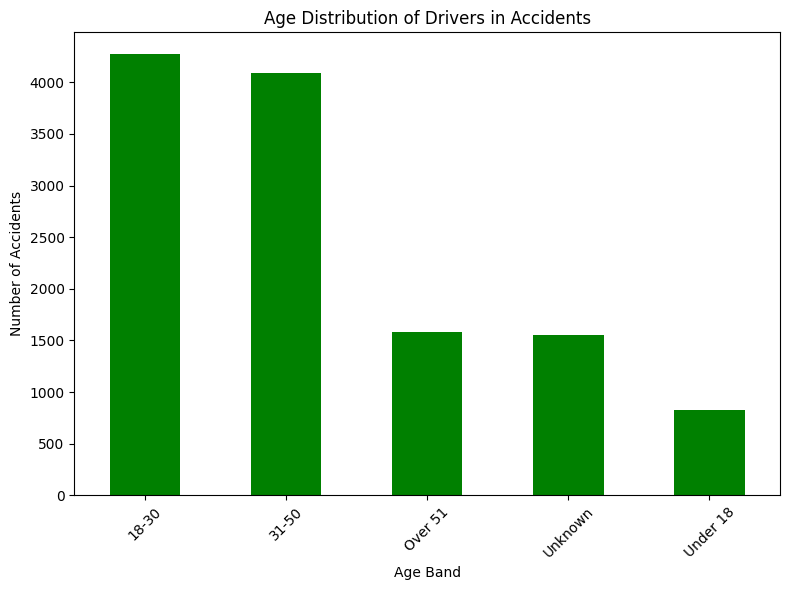

In [409]:
# Count the number of accidents per age band
age_distribution = rta_data['Age Band of Driver'].value_counts()

# Creating a bar chart
plt.figure(figsize=(8, 6))
age_distribution.plot(kind='bar', color='green')
plt.title('Age Distribution of Drivers in Accidents')
plt.xlabel('Age Band')
plt.ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## `2 - Weather Conditions During Accidents [Interactive] `

In [410]:
# Count the number of accidents per weather condition
weather_distribution = rta_data['Weather Conditions'].value_counts()

# Create a list of random colors for the pie chart
num_colors = len(weather_distribution)
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_colors)]


# Create an interactive pie chart using Plotly Express with randomized colors
fig = px.pie(weather_distribution, values=weather_distribution.values, names=weather_distribution.index,
             title='Weather Conditions During Accidents', hole=0.3, color_discrete_sequence=colors)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()


## `3 - Gender Distribution of Drivers in Accidents`

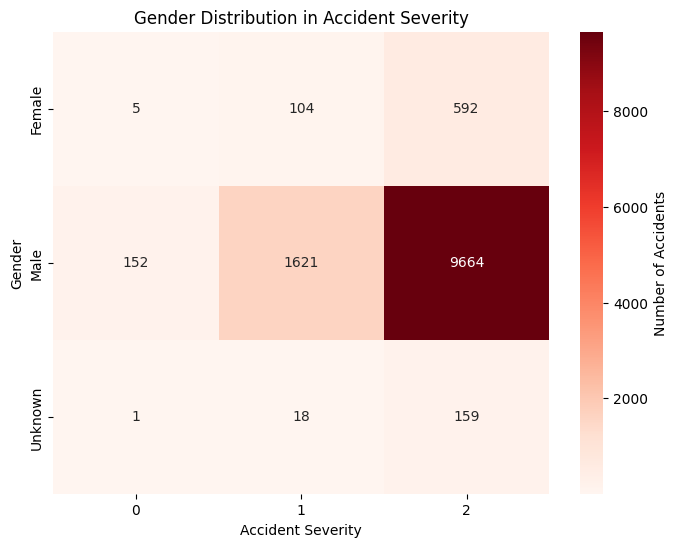

In [411]:
# Creating cross-tabulation of gender and accident severity
gender_severity_counts = pd.crosstab(rta_data['Sex of Driver'], rta_data['Accident Severity'])

# Create a heatmap using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(gender_severity_counts, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'Number of Accidents'})
plt.title('Gender Distribution in Accident Severity')
plt.xlabel('Accident Severity')
plt.ylabel('Gender')
plt.show()

>>>> ### **e. Dashboard creations in i) Tableau and ii) Colab using StreamLit**

 >>>>> ### i) Live Dashboard using [Tableau](https://public.tableau.com/views/Visual_DTK530_MapD/RTA_DB?:language=en-GB&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)

## `Below is a snippet of my Initial Tableau dashboard`

In [412]:
#----------PLEASE NOTE----------#

# For the year range, it's supposed to be (2017-2020) instead of (2017-2022).
# However, I made this error in my initial analysis and had proceeded far in the assignment.
# Returning to the former versions will require that I undo the changes in workbook and it will take time.
# I hope I am pardoned on this error.

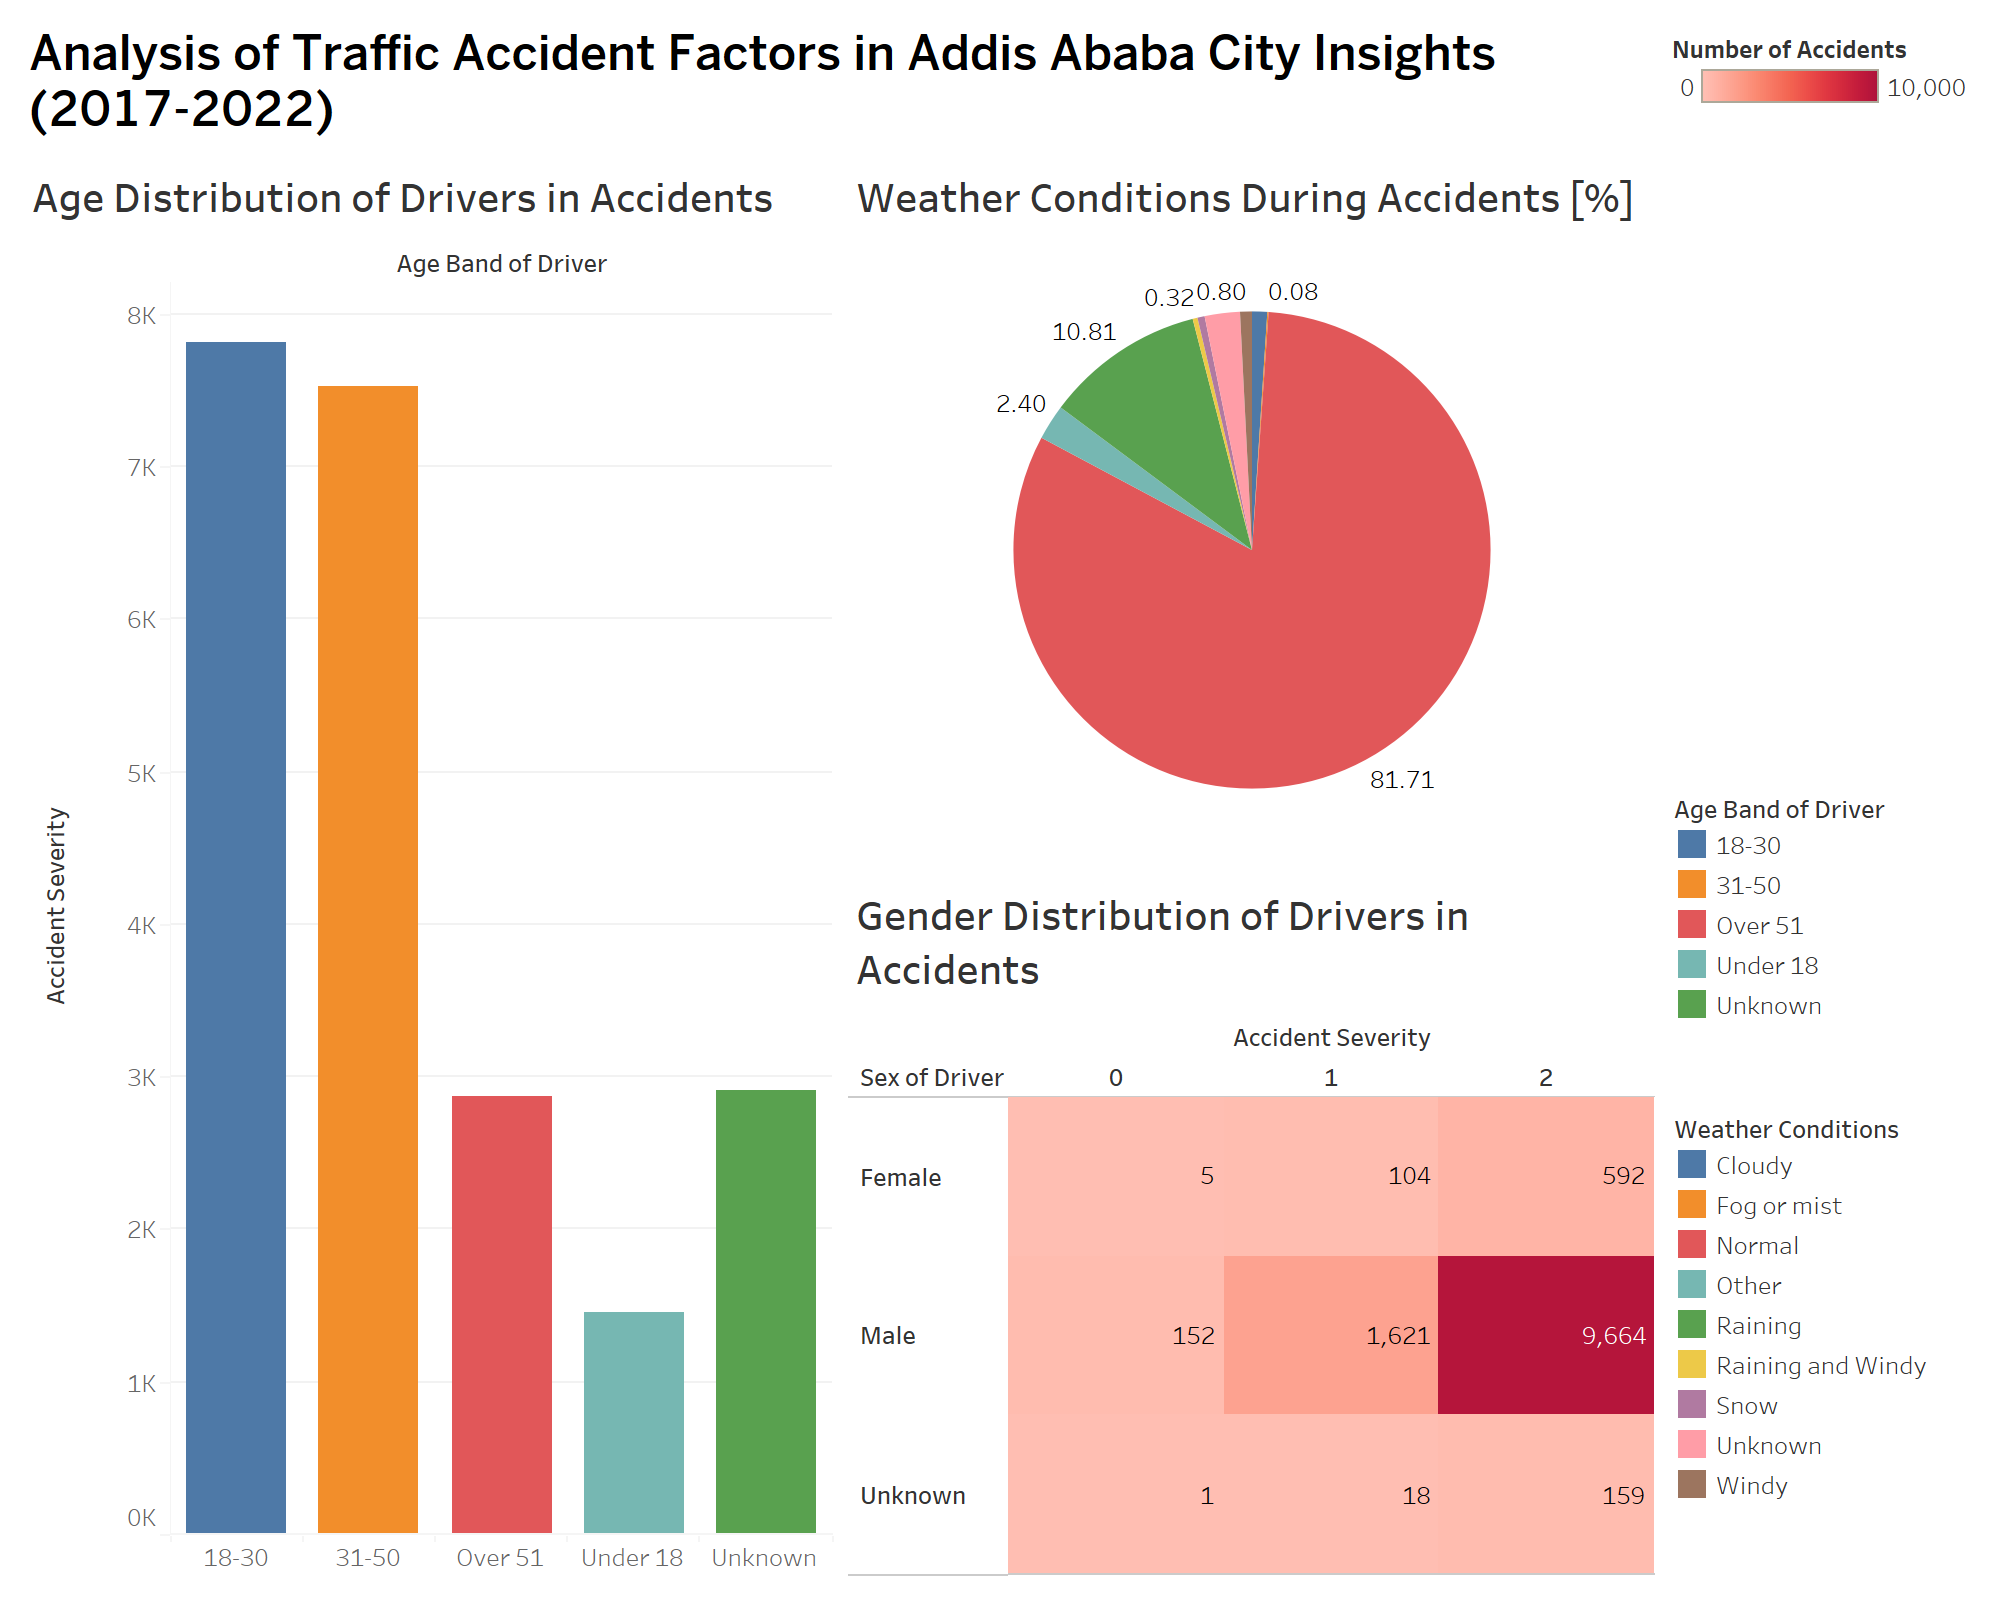

 >>>>> ### ii) Live Dashboard using Streamlit

In [413]:
# Importing streamlit for live dashboards
!pip install streamlit

In [414]:
import streamlit as st

In [415]:
!wget -q -O - ipv4.icanhazip.com

34.74.86.131


In [416]:
%%writefile app.py

import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import pandas as pd
import plotly.express as px
import random

rta_data = pd.read_csv('/content/drive/MyDrive/MEngDTI@Duke/DTK530/I-4/V&D_data/rta_data.csv')

st.title('Analysis of Traffic Accident Factors in Addis Ababa City: Age, Weather, and Gender Insights (2017-2020)')

# 1 - Age Distribution of Drivers in Accidents
st.header('Age Distribution of Drivers in Accidents')
age_distribution = rta_data['Age Band of Driver'].value_counts()
fig, ax = plt.subplots(figsize=(8, 6))
age_distribution.plot(kind='bar', color='green', ax=ax)
ax.set_xlabel('Age Band')
ax.set_ylabel('Number of Accidents')
plt.xticks(rotation=45)
plt.tight_layout()
st.pyplot(fig)


# 2 - Weather Conditions During Accidents
st.header('Weather Conditions During Accidents [Interactive]')
weather_distribution = rta_data['Weather Conditions'].value_counts()
# Create a list of random colors for the pie chart
num_colors = len(weather_distribution)
colors = ['#' + ''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(num_colors)]
# Create an interactive pie chart using Plotly Express with randomized colors
fig = px.pie(weather_distribution, values=weather_distribution.values, names=weather_distribution.index,
             hole=0.3, color_discrete_sequence=colors)
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=True)
st.plotly_chart(fig)


# 3 - Gender Distribution of Drivers in Accidents
st.header('Gender Distribution of Drivers in Accidents')
gender_severity_counts = pd.crosstab(rta_data['Sex of Driver'], rta_data['Accident Severity'])
fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(gender_severity_counts, annot=True, fmt='d', cmap='Reds', cbar_kws={'label': 'Number of Accidents'}, ax=ax)
plt.xlabel('Accident Severity')
plt.ylabel('Gender')
st.pyplot(fig)

Overwriting app.py


In [417]:
# Un-comment this line of code to view this streamlit app in Section 2e) and Comment this similar line of code in Section 3) [Stretch section] to view that streamlit app

#!streamlit run app.py & npx localtunnel --port 8501

>>>> ### **f. Assessment of the two Dashboards in telling the story**

**I. Story Assessment:**
1. The dashboard clearly shows the age distribution of drivers involved in accidents, allowing for easy comparison across age groups.

2. It effectively highlights that younger drivers, particularly those in the 18-30 age range, are indeed more frequently involved in accidents compared to other age groups. Meaning age is a big factor when it comes to accidents (basically answering a question like 'How much time have you had to practice driving?')

3. The dashboard also highlights that weather conditions might be a factor for causing accidents but in this dataset, more accidents happened in normal conditions meaning my argument of environmental conditions being a major factor is validated. There is more to accident causation than weather conditions.

**II. Limitations:**

1. The visualization alone doesn't fully convey the complexity of accident causation as described in the story section. I focused solely on age, weather conditions, driving experience without incorporating other factors such as behavioral choices.

**III. Future Works:**

1. I will incorporate another chart which stacks driving experience with age distribution to get insights into the reasons behind the higher accident involvement of younger drivers, which was part of the stated goal.

**IV. Visual Assessment:**
1. The original dashboard, while informative, lacks visual cohesion and has some readability issues. The use of different color schemes for each chart (blue/orange for age, red for weather, and pink/red for gender) makes the dashboard feel disjointed. The title is smaller and less prominent, and the charts lack clear numbering or hierarchy. The legends are inconsistently placed, with some integrated into the charts and others separate. While the data presentation is clear, the overall design could benefit from a more unified approach to color and layout, which would enhance the dashboard's professional appearance and ease of interpretation.

>>>> ### **g. Considerations, Revisions and Justifications**

**Below are my revisions after the firsty dashboard was visualized on Tableau:**
1. *Unified color scheme:* I adopted a cohesive orange and brown color palette throughout the dashboard, creating a more harmonious visual experience.
2. *Enhanced layout:* I added a border around the title and adjusted the spacing between charts for better organization.
3. *Improved readability:* I numbered each chart and increased the font size of chart titles for easier navigation.
4. *Consistent styling:* I applied the same color scheme to all charts, including the pie chart and heatmap, for a more unified look.
5. *Refined legend placement:* I moved the legends to more appropriate positions near their respective charts.
6. *Title enhancement:* I expanded the title to explicitly mention "Age, Weather, and Gender Insights" for clearer context.

## `Below is a snippet of my Revised Tableau dashboard`

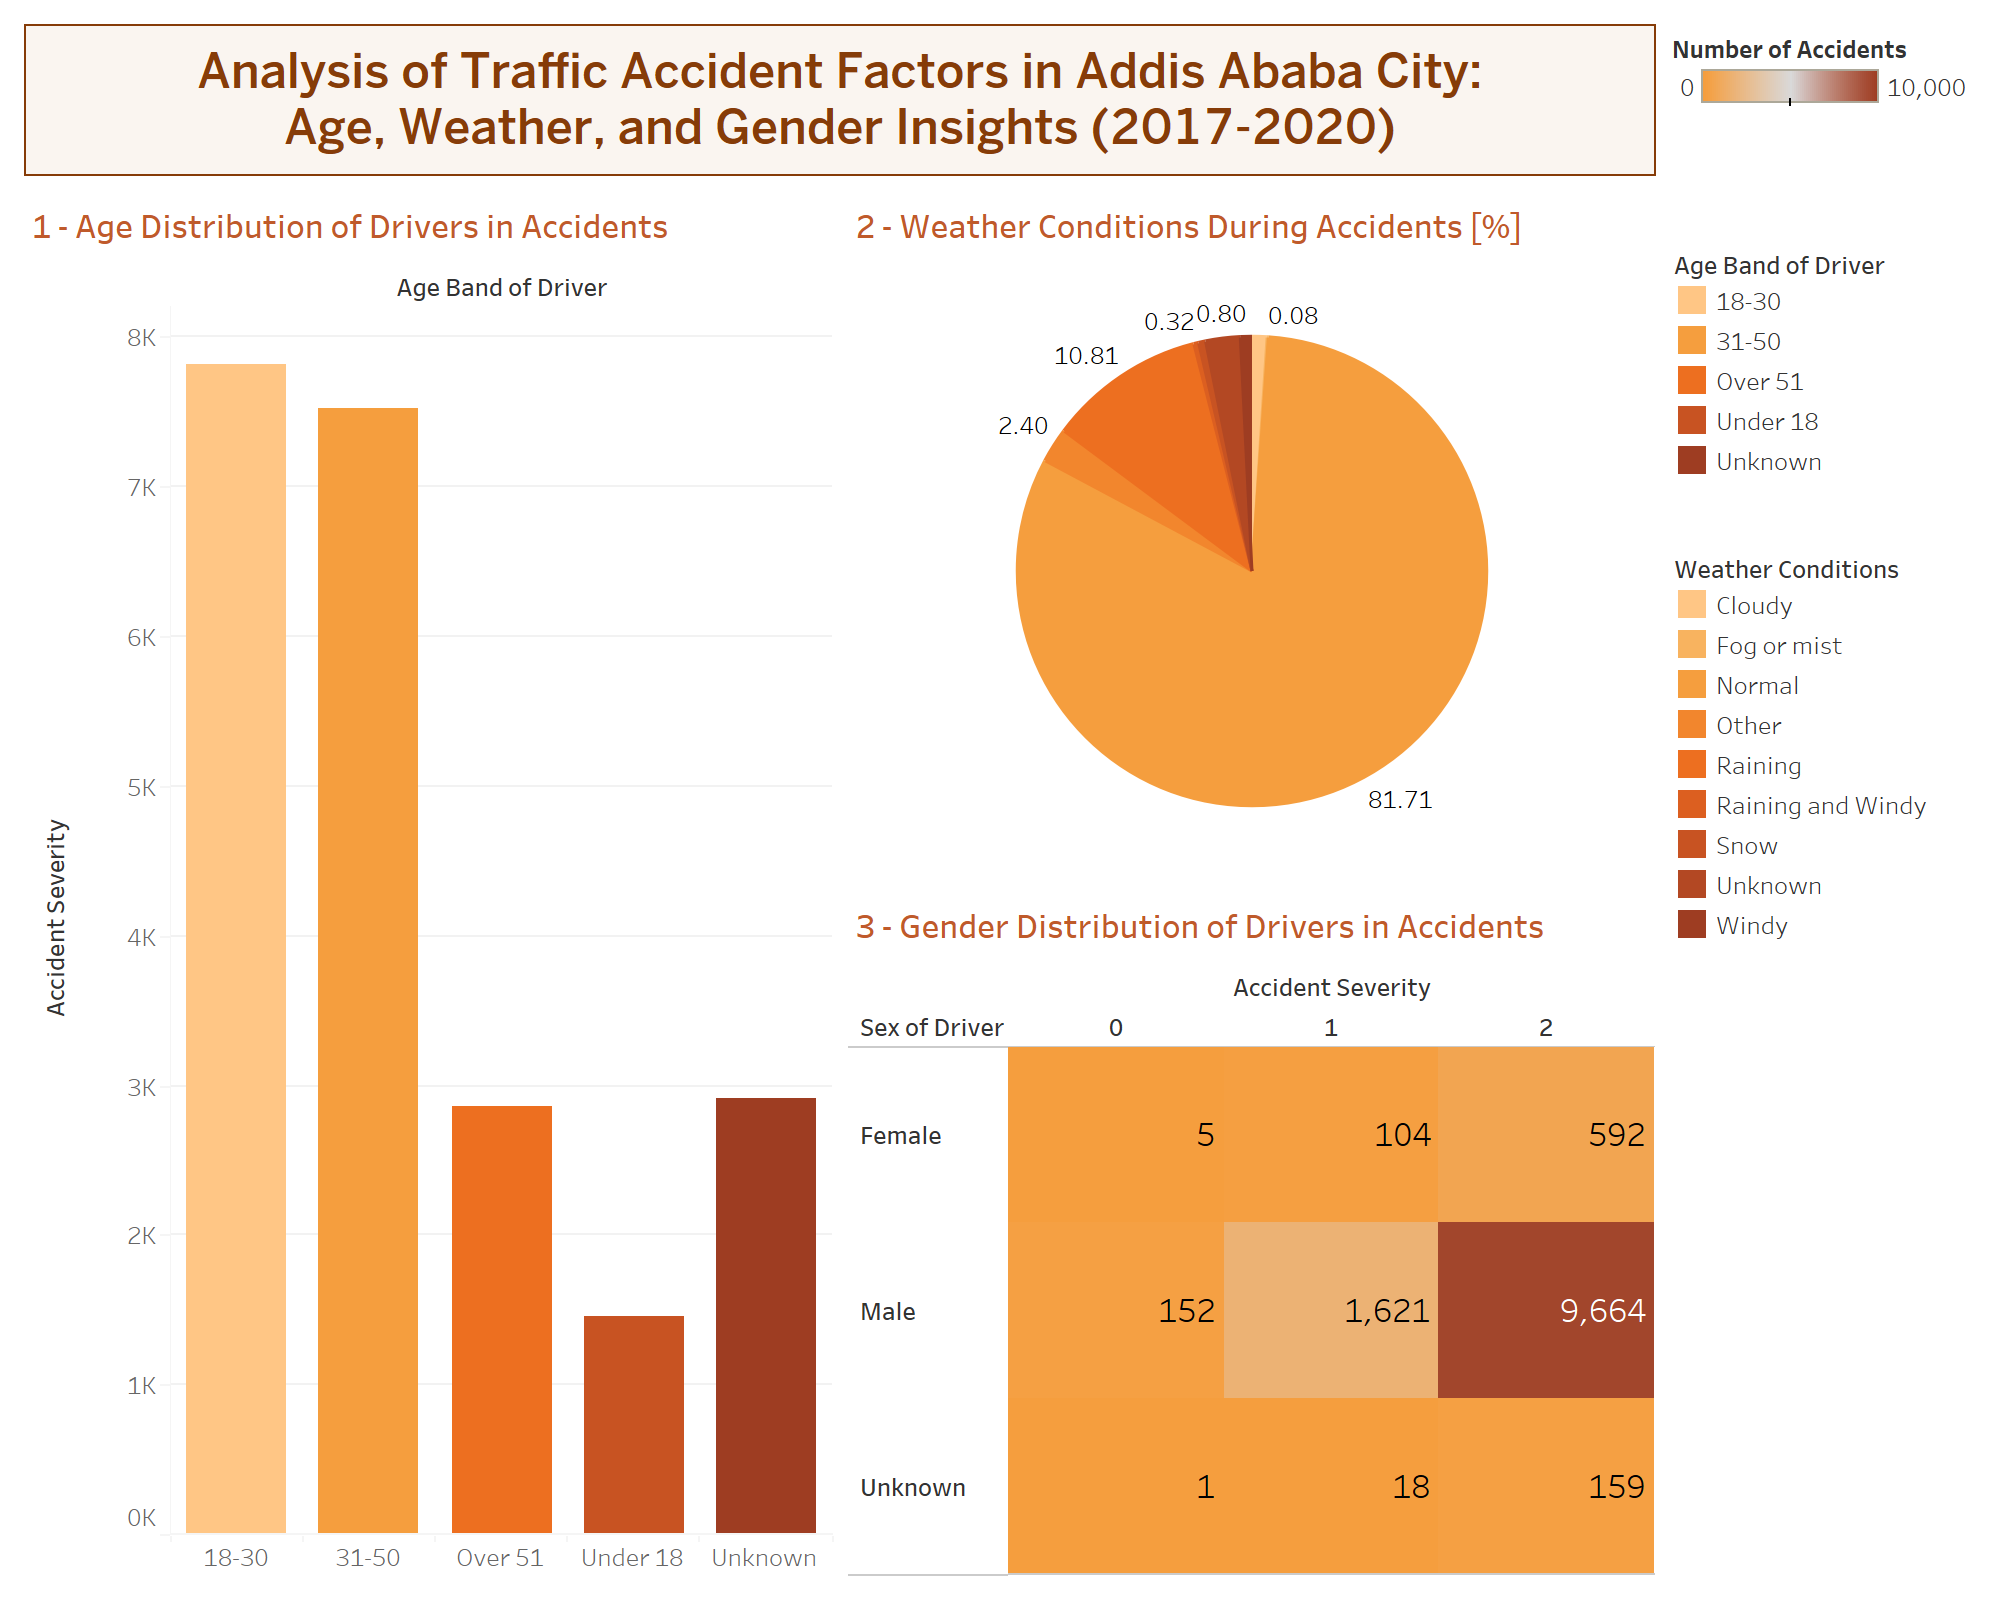

>>> ## **3. Stretch**


**Goal**: For my stretch section, I will enhance the initial Streamlit dashboard by making it responsive. I will incorporate *a gender selector slider* to visualize how the varying genders that are involved in accidents are categorized via age band.

In [418]:
%%writefile app.py

import matplotlib.pyplot as plt
import seaborn as sns
import streamlit as st
import pandas as pd
import plotly.express as px


rta_data = pd.read_csv('/content/drive/MyDrive/MEngDTI@Duke/DTK530/I-4/V&D_data/rta_data.csv')

# Creating another Streamlit app
st.title("Driver Accident Analysis per Gender")

# Createing a selector for gender
selected_gender = st.sidebar.selectbox('Select Gender', rta_data['Sex of Driver'].unique())

gender_filtered = rta_data[rta_data["Sex of Driver"] == selected_gender]

# Plot the Age Distribution of Drivers in Accidents
fig = px.histogram(gender_filtered, x="Age Band of Driver", title="1 - Age Distribution of Drivers in Accidents")
fig.update_traces(marker_color='green')  # Change bar color
fig.update_layout(yaxis_title="Number of Accidents")  # Change y-axis title
st.plotly_chart(fig)

Overwriting app.py


In [419]:
# Un-comment this line of code to view this streamlit app in Section 3) and Comment this similar line of code in Section 2e) [Visualizations from Data] to view that streamlit app

#!streamlit run app.py & npx localtunnel --port 8501